# Wavefunctions

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

## Preliminaries

In [18]:
phi_soti_0 = np.loadtxt(open("data/phi_soti_0.csv"),delimiter=',')
eps_soti_0 = np.loadtxt(open("data/eps_soti_0.csv"),delimiter=',')

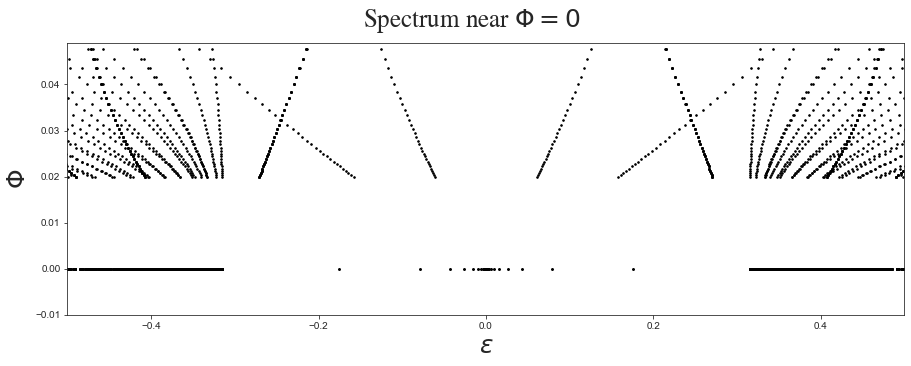

In [50]:
times = {'Fontname':'Times'}
plt.figure(figsize=(15, 5))
plt.scatter(eps_soti_0, phi_soti_0, marker='.', c='k', s=10)
plt.suptitle(r"Spectrum near $\Phi = 0$",**times,fontsize=25)
plt.ylabel(r"$Φ$",**times,fontsize=25)
plt.xlabel(r"$\epsilon$",**times,fontsize=25)
plt.xlim(-0.5,0.5)
plt.ylim(-0.01,0.049)
plt.show()

We are interested in the 4 states converging to zero energy. We can find these by adapting our code.

## 1D probability plots

In [539]:
import soti_wvfcts as sw
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### $\Phi=0$ case

In [541]:
w0=sw.get_wavefunctions(0,50,num_eigs=4)

In [542]:
pxn0,pyn0=sw.wavefunction_to_probability(w0,spin_nos=4) 

In [543]:
pd0 = int((w0.shape[0]/4)**(1/2))
pos = np.arange(pd0)

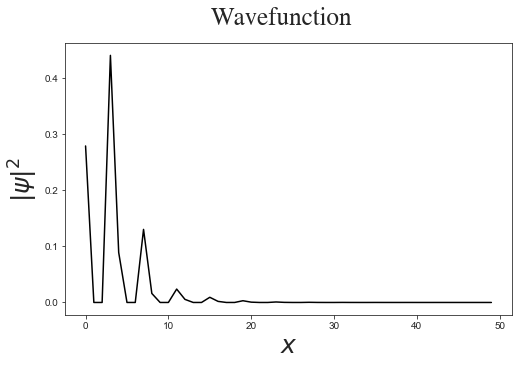

In [546]:
plt.figure(figsize=(8,5))
plt.plot(pos,pxn0[:,1],c='k')
plt.suptitle(r"Wavefunction",**times,fontsize=25)
plt.ylabel(r"$|\psi|^2$",**times,fontsize=25)
plt.xlabel(r"$x$",**times,fontsize=25)
plt.show()

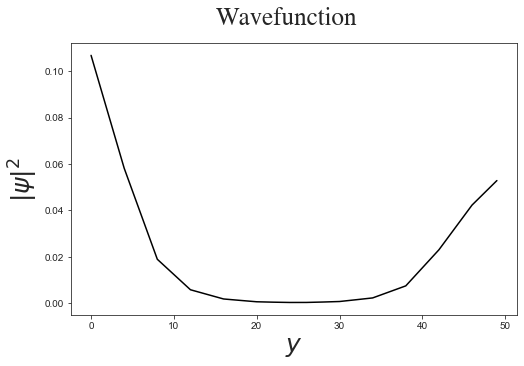

In [545]:
plt.figure(figsize=(8,5))
plt.plot(pos,pyn0[:,0],c='k')
plt.suptitle(r"Wavefunction",**times,fontsize=25)
plt.ylabel(r"$|\psi|^2$",**times,fontsize=25)
plt.xlabel(r"$y$",**times,fontsize=25)
plt.show()

### $\Phi=\frac{1}{50}$

In [22]:
enes,waves=sw.get_wavefunctions(1,50,num_eigs=6)

In [173]:
prob_x_normed,prob_y_normed=sw.wavefunction_to_probability(waves,spin_nos=4) 

In [25]:
pos_dim = int((waves.shape[0]/4)**(1/2))
pos_y = np.arange(pos_dim)
pos_x = np.arange(pos_dim)

<IPython.core.display.Javascript object>


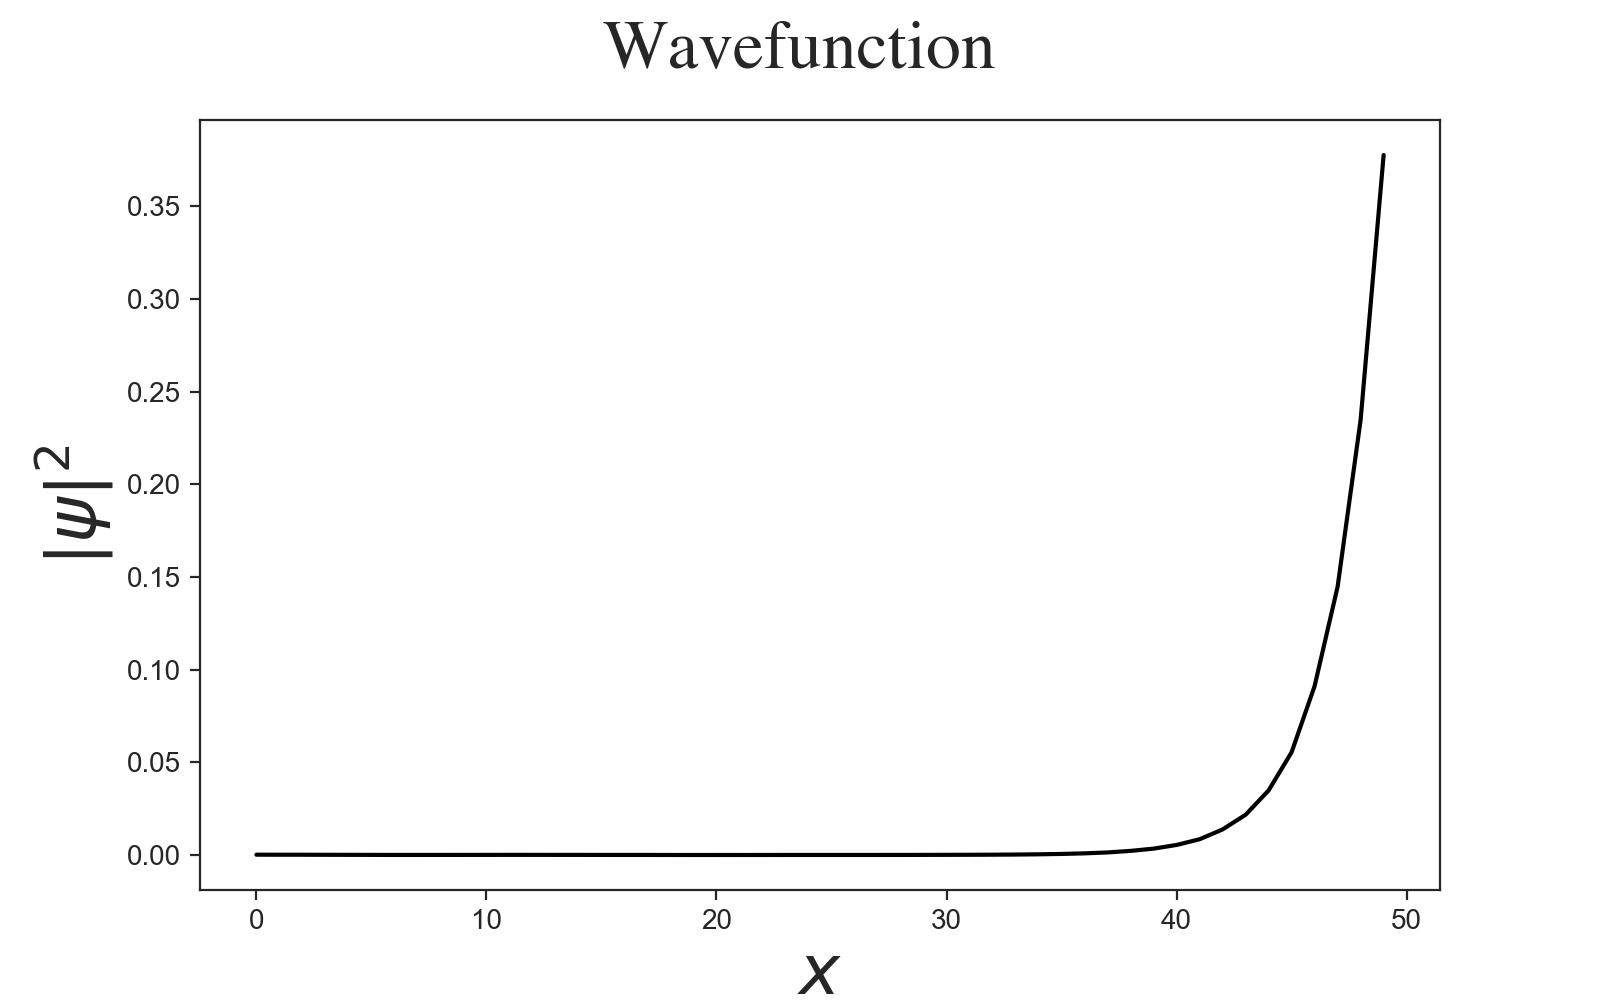

In [502]:
plt.figure(figsize=(8,5))
plt.plot(pos_x,prob_x_normed[:,3],c='k')
plt.suptitle(r"Wavefunction",**times,fontsize=25)
plt.ylabel(r"$|\psi|^2$",**times,fontsize=25)
plt.xlabel(r"$x$",**times,fontsize=25)
plt.show()

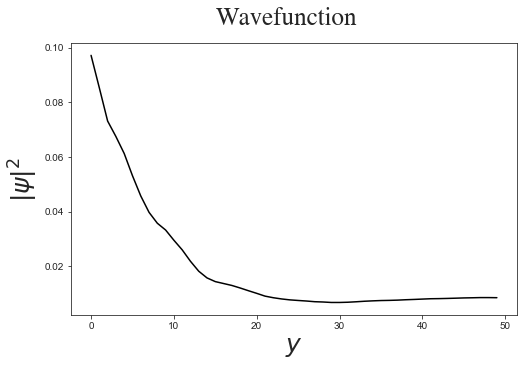

In [506]:
plt.figure(figsize=(8,5))
plt.plot(pos_y,prob_y_normed[:,2],c='k')
plt.suptitle(r"Wavefunction",**times,fontsize=25)
plt.ylabel(r"$|\psi|^2$",**times,fontsize=25)
plt.xlabel(r"$y$",**times,fontsize=25)
plt.show()

## 2D density map

In [196]:
prob_maps=sw.make_density_map(waves,spin_nos=4)

In [ ]:
plt.figure()
plt.imshow(prob_maps[5])
plt.show()

### Movie

In [534]:
data=np.loadtxt(open("wavefunction_maps.csv"),delimiter=',')
data_fixed=data.reshape(-1,4,30,30)

<IPython.core.display.Javascript object>


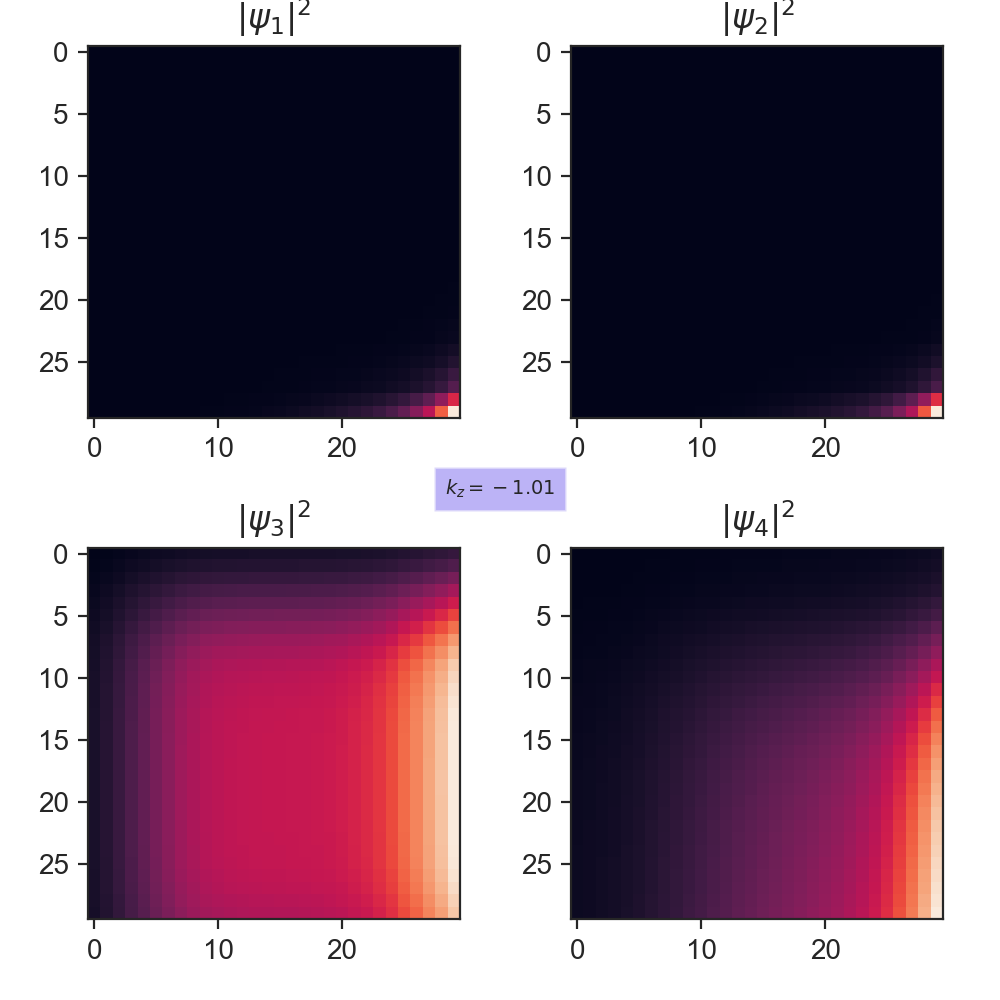

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [438]:
import matplotlib.animation as animation

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(5,5))
fig.tight_layout()
fig.subplots_adjust(hspace=0.3,wspace=0.3)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(101):
    ttl = fig.text(0.5, 0.5, "$k_z={:3.2f}$".format(kzs[i]), fontsize=7, horizontalalignment='center', 
                   verticalalignment='bottom', bbox=dict(facecolor='mediumslateblue', alpha=0.5))
    im0 = ax[0,0].imshow(data_fixed[i,0,:,:], animated=True)
    ax[0,0].set_title("$|\psi_1|^2$")
    im1 = ax[0,1].imshow(data_fixed[i,1,:,:], animated=True)
    ax[0,1].set_title("$|\psi_2|^2$")
    im2 = ax[1,0].imshow(data_fixed[i,2,:,:], animated=True)
    ax[1,0].set_title("$|\psi_3|^2$")
    im3 = ax[1,1].imshow(data_fixed[i,3,:,:], animated=True)
    ax[1,1].set_title("$|\psi_4|^2$")
    ims.append([im0,im1,im2,im3,ttl])

ani = animation.ArtistAnimation(fig, ims, interval=1000/24, blit=True,
                                repeat_delay=1000)

ani.save('dynamic_images.gif',dpi=900)

plt.show()

Try to troubleshoot the `reshape` step by employing a simpler model.

In [535]:
data_sorted_kz=np.zeros((101,4*30,30),dtype=float)
for i in range(101):
    data_sorted_kz[i,:,:]=data[4*30*i:(i+1)*4*30,:]

In [536]:
data_sorted_spins=np.zeros((101,4,30,30),dtype=float)
for i in range(4):
    data_sorted_spins[:,i,:,:]=data_sorted_kz[:,i*30:(i+1)*30,:]

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


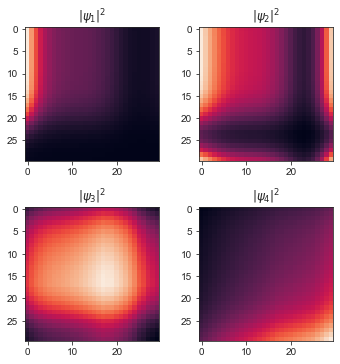

In [538]:
import matplotlib.animation as animation

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(5,5))
fig.tight_layout()
fig.subplots_adjust(hspace=0.3,wspace=0.3)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(101):
    ttl = fig.text(0.5, 0.5, "$k_z={:3.2f}$".format(kzs[i]), fontsize=7, horizontalalignment='center', 
                   verticalalignment='bottom', bbox=dict(facecolor='mediumslateblue', alpha=0.5))
    im0 = ax[0,0].imshow(data_sorted_spins[i,0,:,:], animated=True)
    ax[0,0].set_title("$|\psi_1|^2$")
    im1 = ax[0,1].imshow(data_sorted_spins[i,1,:,:], animated=True)
    ax[0,1].set_title("$|\psi_2|^2$")
    im2 = ax[1,0].imshow(data_sorted_spins[i,2,:,:], animated=True)
    ax[1,0].set_title("$|\psi_3|^2$")
    im3 = ax[1,1].imshow(data_sorted_spins[i,3,:,:], animated=True)
    ax[1,1].set_title("$|\psi_4|^2$")
    ims.append([im0,im1,im2,im3,ttl])

ani = animation.ArtistAnimation(fig, ims, interval=1000/24, blit=True,
                                repeat_delay=1000)

ani.save('dynamic_images1.gif',dpi=900)

plt.show()